In [1]:
%matplotlib inline
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 999)

In [2]:
%%time
users = pd.read_csv('../data/csvs/users.csv', encoding='utf8')
users['created_at'] = pd.to_datetime(users['created_at'],
                                      format="%a %b %d %H:%M:%S +0000 %Y")

CPU times: user 4.45 s, sys: 91 ms, total: 4.55 s
Wall time: 4.55 s


## Análisis usuari@s

In [3]:
len(users)

329782

In [5]:
tweets = pd.read_csv('../data/csvs/tweets.csv', encoding='utf8')
tweets_si = tweets[tweets.posicion == 'si']
tweets_no = tweets[tweets.posicion == 'no']

In [6]:
users_si = users[users.id.isin(tweets_si.user_id)]
len(users_si)

279585

In [7]:
users_no = users[users.id.isin(tweets_no.user_id)]
len(users_no)

69479

## más activ@s

## Sí

In [8]:
top = tweets_si.user_id.value_counts()[:1000]
top_users = users[users.id.isin(top.index)]
top_users['n_tweets'] = top_users.id.apply(lambda i: top[i])
top_users = top_users.sort_values(by='n_tweets', ascending=False)
top_users.head(30)

,screen_name,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at,id,name,verified,n_tweets
272595,mlaurapratt,"Bragado, Argentina",1310,79435,No soy lo que hago. Soy infinita ✌️✌️✌️ Nac & Pop,2171,87699,2010-09-24 02:29:14,194421006,María Laura P,False,700
196690,gabrielamartf,NaN,1145,218414,Carnivora --- Endemoniada,1304,7458,2011-07-11 06:26:51,333236636,Gabriela Martinez,False,695
115283,macia753,NaN,88,3765,NaN,1001,7713,2015-01-03 17:24:49,2958741387,el paraiso,False,640
189737,Stolae,"Buenos Aires, Argentina",6957,66582,Feminista Médico Psiquiatra Psicodramatista DDHH Peronista Profundamente irrespetuoso con cualquier conducta dominante & gurúes & líderes religiosos,6923,14932,2010-06-20 07:36:50,157589057,Enrique Stola,False,620
276110,luciatre86,Ushuaia. Argentina,75,2747,.,364,3609,2013-07-30 10:19:47,1632548502,Lucia Trebucq,False,552
164009,Julieta75672001,Argentina,287,19835,Orgullosa docente en formación del Instituto Dr Joaquín V. González,231,12643,2017-12-03 01:48:36,937136453313859584,JulietaISPJVG,False,459
238023,MarcelaDurrieu,San Isidro,13514,130388,Médica especializada en Salud Pública (UBA). Diputada Nacional (M.C). Vivo en #Beccar.,1188,53240,2013-09-15 14:23:55,1867893876,Marcela Durrieu,True,434
281538,marciaegomez,"Buenos Aires, Argentina.",820,79378,NaN,2001,70158,2011-05-22 23:33:02,303487087,Marcia Gomez,False,420
180015,c73lima1,General Belgrano Buenos Airea,77,6506,Psicóloga social. Docente. Feminista. Luchando por los Derechos en Salud Mental. Loca y Pobre. Aborto Legal ya💚💜,357,7744,2016-08-09 00:52:03,762813659697602560,c73lima,False,404
105945,Chibixio,Argentina,95,1300,Feminist. Pro-choice. Atheist. Pan. Whovian. Jrocker. Manga & J-Fashion lover. Bookworm. Potterhead. Nerd. Fujoshi. Awkward.,195,4083,2010-02-11 17:51:02,113415672,Xiomara B.,False,325


In [18]:
top_users.to_csv('../data/top_users_si.csv', index=False, encoding='utf8')

## No

In [9]:
top = tweets_no.user_id.value_counts()[:1000]
top_users = users[users.id.isin(top.index)]
top_users['n_tweets'] = top_users.id.apply(lambda i: top[i])
top_users = top_users.sort_values(by='n_tweets', ascending=False)
top_users.head(30)

,screen_name,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at,id,name,verified,n_tweets
5326,FfErnest,Argentina,127,2013,Provida,668,2210,2018-05-23 00:49:48,999089982227742721,Gerardo Williams,False,693
118319,AspiazuEsper,NaN,108,1854,NaN,566,6086,2016-04-27 01:23:44,725133295583907840,ÁngelesEsperAspiazú,False,638
43143,patubela001,NaN,101,7964,NaN,108,9120,2014-05-16 10:46:04,2498301943,SilvanaA,False,476
234726,IsaBellaNHoran,Kingdom Of Heavens,649,7837,"""Oye, Israel: el Señor nuestro Dios, el Señor uno es."" 🕎🇮🇱✝❤",534,3544,2010-10-24 03:37:35,206944231,Isabella Gómez,False,435
29331,CarmenElenaAFC,CABA🇦🇷,3902,120407,https://t.co/TZhKGH7f3b|503🇸🇻|al ALIANZA FC lo amo con locura💙🐘42.|Invictus😍|River♥️🐔|acting student🎬🇮🇳|Pokémon💛|,1948,19094,2009-06-10 18:23:30,46184752,Carmen Elena Pinto🏆🐘,False,408
128170,Julucata2,NaN,13,1321,NaN,347,3367,2017-10-18 02:05:50,920470947987099648,Julucata,False,403
139349,johnnyandino1,Ecuador,827,162300,"En la izquierda hay oportunistas, en la derecha canibalismo, el camino es la Doctrina Social de la Iglesia. Viva Cristo Rey!!! Provida",830,4130,2012-03-12 02:40:13,521888649,J Andino,False,399
307292,lucasmicaelist6,"Tucumán, Argentina",45,6129,Bancando a la reina @micaviciconte futbol /volley #MTVLAINSTAARVICICONTE #PremiosMTVMiaw,212,99,2018-04-17 04:31:28,986099802168549381,lucas micaelisto,False,372
36625,martigonzalez02,NaN,160,3736,"Por eso, si me querés hablar de amor... vení que te cuento qué es ser de CARAHUE🖤",198,4150,2015-10-23 23:41:11,4027639589,Marti💙,False,369
151087,alejandro_braun,NaN,93,2399,NaN,255,2397,2013-07-30 15:35:28,1633197230,Alejandro,False,365


In [20]:
top_users.to_csv('../data/top_users_no.csv', index=False, encoding='utf8')

## Actividad

In [11]:
import matplotlib.pyplot as plt

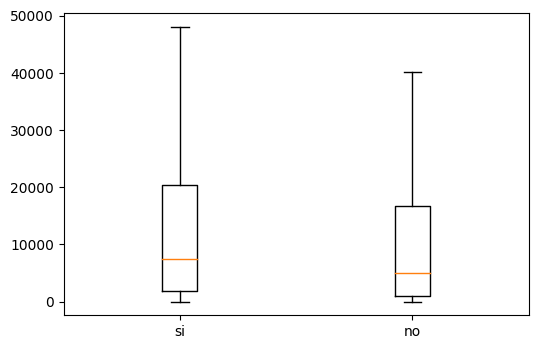

In [12]:
plt.boxplot([users_si.statuses_count, users_no.statuses_count],
            labels=["si", "no"],
            showfliers=False)
plt.show()

## Seguidores

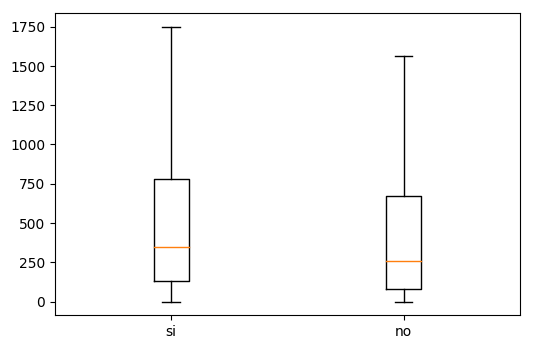

In [42]:
plt.boxplot([users_si.followers_count, users_no.followers_count],
            labels=["si", "no"],
            showfliers=False)
plt.show()

## Fechas de creación de perfiles

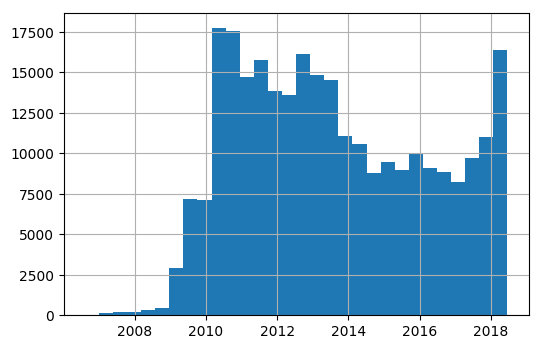

In [13]:
users_si.created_at.hist(bins=30)

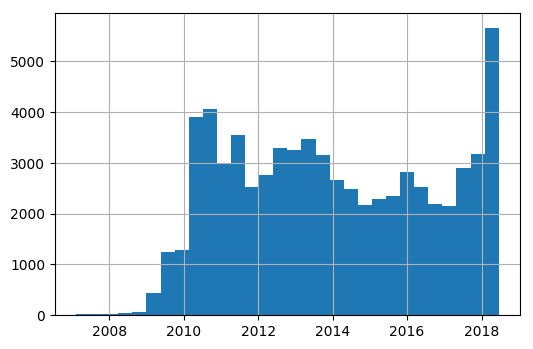

In [14]:
users_no.created_at.hist(bins=30)

## Cuentas verificadas

In [15]:
users_si.verified.value_counts()

False    278899
True     686   
Name: verified, dtype: int64

In [16]:
users_no.verified.value_counts()

False    69402
True     77   
Name: verified, dtype: int64

In [17]:
users_si[users_si.verified]

,screen_name,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at,id,name,verified
580,SofCastanon,"Xixón, Asturies",11693,10173,Con los ojos atentos y las palabras a mano. Secretaria de Feminismos Interseccional y LGTBI en @ahorapodemos. Diputada por Asturies en el Congreso.,1941,10519,2015-08-30 22:48:44,3495603017,Sofía Castañón,True
3201,luisbremer,Argentina,383665,272602,El Trece - Radio Conexion Abierta,2528,64723,2010-06-16 11:45:01,156242969,Luis Bremer,True
3213,MarisaGlave,Peru,249071,11125,Socióloga e investigadora. Activista del Nuevo Perú. Congresista de la República del Perú.,599,2490,2010-08-01 19:29:48,173544494,Marisa Glave,True
4116,nestorpitrola,Ciudad de Buenos Aires,41003,31348,Dirigente nacional del @PartidoObrero en el Frente de Izquierda,506,175,2011-02-25 12:05:58,257432060,Néstor Pitrola,True
4411,Marianoberonok,Buenos Aires,98604,7285,CONTRATACIONES e INFORMACION: Info@marianoberonmusic.com https://t.co/v2zpGtgV1G https://t.co/cyy6NwBUqV https://t.co/zifPcG4Lvc,293,31902,2011-02-06 16:02:52,248251555,Mariano Beron 🤪,True
4576,Pablo_Iglesias_,Madrid,2308222,18838,Secretario Gral. de @ahorapodemos y diputado en el Congreso. Profesor honorífico de la UCM. Nadie duda de que este país ya ha cambiado. ¡Sí se puede!,2641,6526,2010-06-22 11:48:26,158342368,Pablo Iglesias,True
5258,HermesBinner,Santa Fe - Argentina,177786,2994,Médico. Ex Gobernador de la Provincia de Santa Fe,191,320,2010-08-05 19:51:59,175157212,Hermes Binner,True
5267,JorgeTaiana,"Buenos Aires, Argentina",67952,7228,"Diputado del Parlasur. Ex Canciller de la Nación. Peronista. Sociólogo, Director del CIEP (UNSaM). Casado. Padre de tres hijxs.",558,1352,2014-08-07 15:13:07,2714771804,Jorge Taiana,True
5519,AngeldebritoOk,NaN,3039071,262357,1 0 3 0 #LAM,18,16403,2010-05-17 03:21:22,144712423,🅰️NGELITO,True
5599,camilogarcia,NaN,318262,34843,Productor Musical - DJ - Conductor de #MinutosContados - Radio De Plata,5455,23377,2008-08-05 15:57:57,15737712,camilogarcia,True


In [18]:
users_no[users_no.verified]

,screen_name,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at,id,name,verified
1578,aciprensa,NaN,262695,74215,Cuenta Oficial de ACI Prensa | Noticias y recursos sobre la Iglesia Católica en todo el mundo.,970,1462,2008-12-03 04:06:54,17828368,ACI Prensa,True
4345,vivicanosaok,NaN,289880,19649,No respondo mensajes privados.,32188,30886,2012-02-02 00:36:50,480860644,Viviana,True
5519,AngeldebritoOk,NaN,3039071,262357,1 0 3 0 #LAM,18,16403,2010-05-17 03:21:22,144712423,🅰️NGELITO,True
5754,ForoFamilia,Españab,12084,12759,Asociación de asociaciones que trabajan por la Familia. #HablandoBienDeLasCosasBuenas,412,2617,2009-11-25 10:20:39,92492730,Foro de la Familia,True
8705,PauGomezcaro,NaN,14618,25370,Conductora de deportes en @adrenalina e @ImagenTVDeporte Contrataciones: PauGomezcaro@gmail.com,1010,17046,2009-09-01 21:35:55,70792916,Pau Gomezcaro,True
17205,Nicolas_Massot,NaN,35876,676,"Presidente del Bloque PRO, Honorable Cámara de Diputados de la Nación",142,94,2015-11-16 00:55:37,4198001913,Nicolás Massot,True
25552,perfilcom,Argentina,738338,170254,"Noticias desde Buenos Aires, Argentina. Periodismo puro en tiempo real.",2207,276,2008-09-15 11:08:46,16294264,Perfil.com,True
25745,Klemensiewicz,Ciudad Autónoma de Buenos Aire,22908,5189,"Argentina, politóloga, madre de 3 hijos maravillosos y Secretaria de Infraestructura Urbana de la Nación.",846,3330,2010-06-29 18:14:55,160998065,Marina Klemensiewicz,True
31418,Pilarsmith,argentina,257314,44597,Cuenta Oficial de la Periodista de Espectaculos en @telefenoticias @buentelefe Corresponsal argentina de HOLATV para Miami y Latinoamerica. Canal 26/Late93.1,3308,15712,2010-10-09 01:04:54,200328797,Pilar Smith,True
31898,diarioTodoJujuy,San Salvador de Jujuy,15914,65031,Todo Jujuy Diario digital. Noticias al instante las 24 hs.,255,562,2012-07-17 12:35:08,700978591,Todo Jujuy,True
